# Extracted data EDA
Scopus query:
```
( TITLE-ABS-KEY ( predictive maintenance ) OR TITLE-ABS-KEY ( PdM ) OR TITLE-ABS-KEY ( fault detection ) OR TITLE-ABS-KEY ( remaining useful life ) OR TITLE-ABS-KEY ( RUL ) ) AND ( ABS ( sensor ) OR ABS ( IoT ) ) AND PUBYEAR > 2019 AND PUBYEAR < 2026 AND ( EXCLUDE ( DOCTYPE , "re" ) OR EXCLUDE ( DOCTYPE , "cr" ) OR EXCLUDE ( DOCTYPE , "dp" ) OR EXCLUDE ( DOCTYPE , "bk" ) OR EXCLUDE ( DOCTYPE , "tb" ) OR EXCLUDE ( DOCTYPE , "le" ) OR EXCLUDE ( DOCTYPE , "ed" ) OR EXCLUDE ( DOCTYPE , "er" ) ) AND ( LIMIT-TO ( SUBJAREA , "ENGI" ) OR LIMIT-TO ( SUBJAREA , "COMP" ) ) AND ( LIMIT-TO ( LANGUAGE , "English" ) ) AND ( EXCLUDE ( EXACTKEYWORD , "Digital Storage" ) OR EXCLUDE ( EXACTKEYWORD , "Network Security" ) OR EXCLUDE ( EXACTKEYWORD , "Timing Circuits" ) OR EXCLUDE ( EXACTKEYWORD , "Electric Fault Currents" ) OR EXCLUDE ( EXACTKEYWORD , "Aircraft Detection" ) OR EXCLUDE ( EXACTKEYWORD , "Wireless Sensor Networks" ) OR EXCLUDE ( EXACTKEYWORD , "&apos;current" ) OR EXCLUDE ( EXACTKEYWORD , "Wind Turbines" ) OR EXCLUDE ( EXACTKEYWORD , "Edge Computing" ) OR EXCLUDE ( EXACTKEYWORD , "Railroads" ) OR EXCLUDE ( EXACTKEYWORD , "Matlab" ) OR EXCLUDE ( EXACTKEYWORD , "Unmanned Aerial Vehicles (uav)" ) OR EXCLUDE ( EXACTKEYWORD , "Antennas" ) OR EXCLUDE ( EXACTKEYWORD , "Smart Power Grids" ) OR EXCLUDE ( EXACTKEYWORD , "Railroad Transportation" ) OR EXCLUDE ( EXACTKEYWORD , "Electric Inverters" ) OR EXCLUDE ( EXACTKEYWORD , "Electric Power Transmission Networks" ) )

```
Yeilds 9006 results

In [298]:
from collections import Counter, defaultdict
import itertools
import re
import pandas as pd
import numpy as np
import spacy
import hdbscan
import fasttext
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [55]:
# df[df['Output'].isna()]
# df.drop([4719],inplace=True)
# df.at[6976, 'Domain category'] = 'Other'
# df.to_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/extracted_data_all_categories.csv",index=None)


In [154]:
dfa = pd.read_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/A-Z.csv")
dfb = pd.read_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/Z-A.csv")
raw_data = pd.concat([dfa,dfb]).reset_index(drop=True)

In [155]:
raw_data.head()

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,DOI,Link,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,Chen X.; Hu Y.; Gu Y.; Lin Y.,"Chen, Xiaoxin (59667142000); Hu, Yuhui (596660...",59667142000; 59666011500; 7403045993; 59538509100,Rolling bearing fault diagnosis method of acou...,2024,15th Global Reliability and Prognostics and He...,NaN,NaN,NaN,NaN,...,10.1109/PHM-BEIJING63284.2024.10874631,https://www.scopus.com/inward/record.uri?eid=2...,Bearing faults are one of the most common caus...,Acoustic-vibration fusion; Attention-1DCNN; Fa...,Acoustic emission testing; Acoustic emissions;...,Conference paper,Final,NaN,Scopus,2-s2.0-85219599283
1,Singha A.; Ali J.; Khera V.,"Singha, Anudruti (57220211068); Ali, Junaid (5...",57220211068; 57215967124; 57222122147,Predictive Failure Analysis of Spindle Motor &...,2020,2020 IEEE 17th India Council International Con...,NaN,NaN,9342533,NaN,...,10.1109/INDICON49873.2020.9342533,https://www.scopus.com/inward/record.uri?eid=2...,"With the advent of Industry 4.0, manufacturing...",Fast Fourier Transform; Internet of Things (Io...,Costs; Cutting fluids; Deterioration; Failure ...,Conference paper,Final,NaN,Scopus,2-s2.0-85101539067
2,Papadopoulos P.M.; Lymperopoulos G.; Polycarpo...,"Papadopoulos, Panayiotis M. (56423323300); Lym...",56423323300; 25031948600; 7006251578; 24514347400,Model-based fault detection and localization a...,2020,16th Conference of the International Society o...,NaN,NaN,NaN,NaN,...,NaN,https://www.scopus.com/inward/record.uri?eid=2...,This work presents the design of a model-based...,Air handling units; Fault diagnosis in buildin...,Air quality; Fault detection; Indoor air pollu...,Conference paper,Final,NaN,Scopus,2-s2.0-85101634616
3,Eisermann C.; Voigt C.; Marx S.; Kang C.,"Eisermann, Cedric (58809877800); Voigt, Chris ...",58809877800; 57459489100; 14013879200; 5720079...,The Initial Structural Health Monitoring Syste...,2024,11th European Workshop on Structural Health Mo...,NaN,NaN,NaN,NaN,...,10.58286/29620,https://www.scopus.com/inward/record.uri?eid=2...,As an essential part of the validation project...,Nibelungen Bridge Worms; predictive maintenanc...,Bridges; Structural health monitoring; Conditi...,Conference paper,Final,All Open Access; Gold Open Access,Scopus,2-s2.0-85202570011
4,Li M.; Bai J.; Xia H.; Xu L.; Ding D.; Ren C.,"Li, Min (57221971210); Bai, Jichang (572219701...",57221971210; 57221970105; 57217361993; 5721735...,Test research on poor contact defect detection...,2020,2020 IEEE 1st China International Youth Confer...,NaN,NaN,9332738,NaN,...,10.1109/CIYCEE49808.2020.9332738,https://www.scopus.com/inward/record.uri?eid=2...,GIS is the key equipment in power transmission...,Conductive loop; GIS; Poor contact; Temperatur...,Defects; Electric power supplies to apparatus;...,Conference paper,Final,NaN,Scopus,2-s2.0-85100730328


In [114]:
years = Counter(raw_data['Year'])
years

Counter({2024: 2227,
         2023: 1692,
         2022: 1404,
         2025: 1385,
         2021: 1236,
         2020: 1062})

In [115]:
sorted_dict = dict(sorted(years.items()))

In [116]:
sorted_dict

{2020: 1062, 2021: 1236, 2022: 1404, 2023: 1692, 2024: 2227, 2025: 1385}

In [261]:
colors=['#7d287e', '#036664', '#013648','#ceb381']
# 

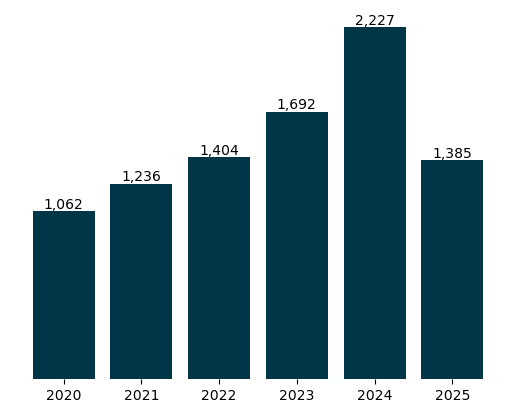

In [262]:
fig, ax = plt.subplots()
bars = ax.bar(list(years.keys()), list(years.values()), color=colors[2])

# plt.title("Number of publications per year")
for c in ax.containers:
    ax.bar_label(c, fmt='{:,.0f}')
# ax.bar_label(bars)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.savefig("Documents/literature review/figures/num_pub.svg",format='svg')
plt.savefig("Documents/literature review/figures/num_pub.png",format='png')
plt.show()


In [263]:
doc_types = Counter(raw_data['Document Type'])
doc_types

Counter({'Article': 4808,
         'Conference paper': 3786,
         'Book chapter': 405,
         'Short survey': 7})

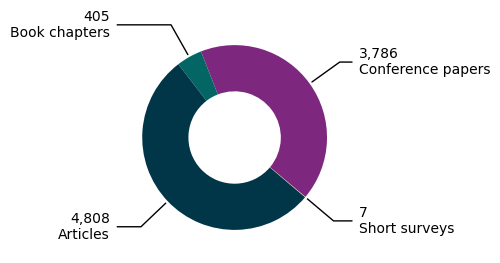

In [282]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

labels = list(doc_types.keys())
data = list(doc_types.values())

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="w", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(f'{data[i]:,}')+"\n"+labels[i]+"s", xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# ax.set_title("Document types")
plt.savefig("Documents/literature review/figures/doc_types.svg",format='svg')
plt.savefig("Documents/literature review/figures/doc_types.png",format='png')
plt.show()

In [ ]:
df = pd.read_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/extracted_data_all_categories.csv")

In [158]:
col_counts = defaultdict()
for col in df.columns:
    
    col_counts[col] = len(df[col].unique())

col_counts

defaultdict(None,
            {'Domain': 4273,
             'Domain category': 46,
             'Domain subcategory': 31,
             'Input': 859,
             'Output': 1247,
             'Modeling category': 99,
             'Modeling technique': 6883,
             'Explainability': 3653,
             'Relevance': 6,
             'EID': 9003})

In [198]:
col_count_data = {'Domain': 4273,
             'Input': 859,
             'Output': 1247,
             'Modeling category': 99,
             'Modeling technique': 6883,
             'Explainability': 3653,
             'Relevance': 6}

col_count_data = dict(sorted(col_count_data.items(), key=lambda kv: kv[1], reverse=False))

In [199]:
col_count_data

{'Relevance': 6,
 'Modeling category': 99,
 'Input': 859,
 'Output': 1247,
 'Explainability': 3653,
 'Domain': 4273,
 'Modeling technique': 6883}

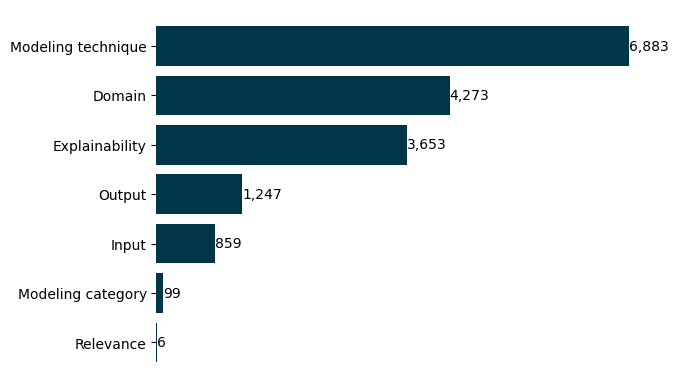

In [292]:
fig, ax = plt.subplots()
bars = ax.barh(list(col_count_data.keys()), list(col_count_data.values()), color=colors[2])

# plt.title("Number of unique values in each column")
for c in ax.containers:
    ax.bar_label(c, fmt='{:,.0f}')
# ax.bar_label(bars)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
# ax.get_yaxis().set_ticks([])
plt.savefig("Documents/literature review/figures/col_counts.svg",format='svg')
plt.show()


In [ ]:
print(len(df))
df.columns

9003


Index(['Domain', 'Domain category', 'Domain subcategory', 'Input', 'Output',
       'Modeling category', 'Modeling technique', 'Explainability',
       'Relevance', 'EID'],
      dtype='object')

In [201]:
domains = Counter(df['Domain category'])
len(domains)

46

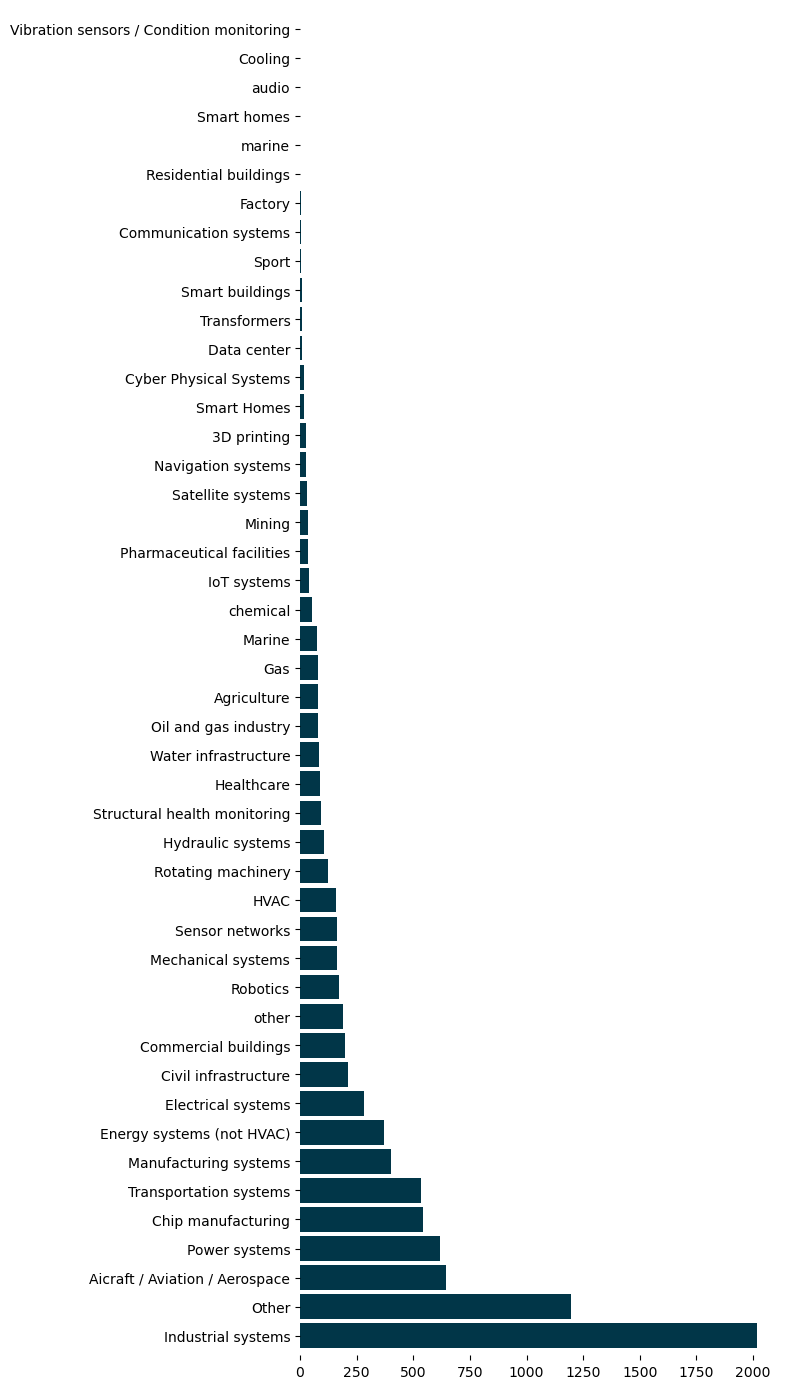

In [294]:
# title="Number of articles in each category",
ax = df['Domain category'].value_counts().plot(kind='barh',
                                    figsize=(8,14),
                                   
                                              color=colors[2],
                                              width=0.85)
ax.set_ylabel("")
ax.set_xlabel("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig("Documents/literature review/figures/domains.svg",format='svg')
plt.savefig("Documents/literature review/figures/domains.png",format='png')
plt.show()

## Remove irrelevant domain categories

In [208]:
df['Domain category'].unique()

array(['Aicraft / Aviation / Aerospace', 'Industrial systems',
       '3D printing', 'Civil infrastructure', 'Chip manufacturing',
       'Satellite systems', 'Transportation systems', 'Agriculture',
       'Marine', 'Manufacturing systems', 'Commercial buildings',
       'Power systems', 'Sport', 'Oil and gas industry',
       'Energy systems (not HVAC)', 'other', 'Sensor networks', 'Other',
       'Hydraulic systems', 'Structural health monitoring',
       'Water infrastructure', 'Robotics', 'Mechanical systems',
       'Rotating machinery', 'Healthcare', 'Factory',
       'Electrical systems', 'Vibration sensors / Condition monitoring',
       'Data center', 'Gas', 'Pharmaceutical facilities', 'IoT systems',
       'HVAC', 'chemical', 'Smart Homes', 'Navigation systems', 'Mining',
       'Cyber Physical Systems', 'Transformers', 'Smart homes',
       'Communication systems', 'Smart buildings',
       'Residential buildings', 'audio', 'Cooling', 'marine'],
      dtype=object)

In [ ]:
df[df['Domain category']=='Civil infrastructure']

,Domain,Domain category,Domain subcategory,Input,Output,Modeling category,Modeling technique,Explainability,Relevance,EID
3,Civil infrastructure / Structural health monit...,Civil infrastructure,NaN,Electro-mechanical impedance data,Damage classification,Data driven,"['Decision trees', 'Random forests', 'K-neares...","Yes: Decision trees, Random forests, K-nearest...",3.0,2-s2.0-85201317790
16,Civil structures / Structural health monitorin...,Civil infrastructure,NaN,Sensor data,Fault prediction,Hybrid,"Autoencoders, Particle filters",Yes: fault indicator modules with thresholds a...,3.0,2-s2.0-85107872040
22,Bridges / Structural Health Monitoring,Civil infrastructure,Bridges,Sensor data,Condition indicators / Deviation detection,Data driven,Statistical evaluation,Yes: Statistical analysis and visualization,2.0,2-s2.0-85202570011
76,Municipal infrastructure / Urban lighting systems,Civil infrastructure,NaN,Sensor data,Fault prediction,Data driven,"Fault detection algorithms, IoT-based monitoring",Yes: Rule-based / threshold-based detection,4.0,2-s2.0-85200654885
93,Structural health monitoring of large-scale in...,Civil infrastructure,Bridges,Sensor data,Structural damage assessment,Physics based,Reduced-order modeling (SCRBE),Yes: Model-based and component-based approaches,3.0,2-s2.0-85202601068
...,...,...,...,...,...,...,...,...,...,...
8600,Wastewater treatment plants,Civil infrastructure,wastewater,Sensor data,Data quality control / Fault detection,Data driven,LSTM autoencoder,No,2.0,2-s2.0-85191427879
8625,Bridge infrastructure / Civil engineering,Civil infrastructure,Bridges,Sensor data,Fault prediction / Anomaly detection,Data driven,"Feature vector analysis, Statistical analysis",Yes: Feature-based interpretation,4.0,2-s2.0-85152238344
8720,Bridge health monitoring / Structural health m...,Civil infrastructure,Bridges,"Finite element simulation data, earthquake acc...",Damage location / Damaged components detection,Rules and/or logic based,"Finite element modeling, Fault tree analysis",Yes: Fault tree analysis,2.0,2-s2.0-85079128948
8828,Wastewater treatment bioprocess,Civil infrastructure,wastewater,Sensor data,Fault prediction,Hybrid,"['Interval estimation', 'Set-membership estima...",Yes: set-based estimation and interval residua...,2.0,2-s2.0-85194923125


In [209]:
domain_include_df = df[df['Domain category'].isin(['Industrial systems',
                                                   'Chip manufacturing',
                                                   'Manufacturing systems', 
                                                   'Commercial buildings',
                                                   'Rotating machinery',
                                                   'Factory',
                                                   'Vibration sensors / Condition monitoring',
                                                   'Data center', 
                                                   'Pharmaceutical facilities',
                                                   'HVAC',
                                                   'Cooling'])]
len(domain_include_df)

3495

In [211]:
len(df) - len(domain_include_df)

5508

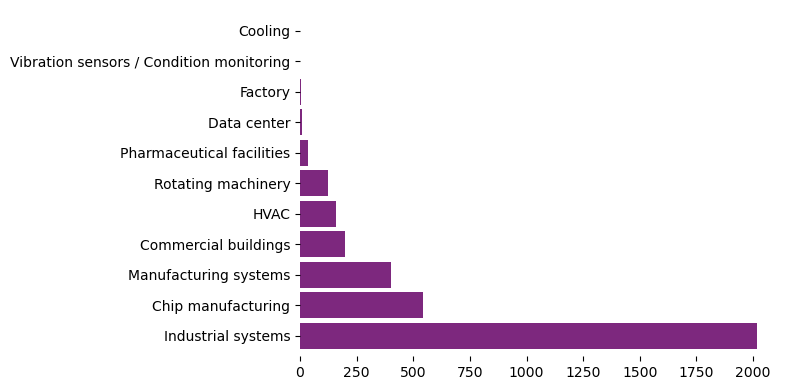

In [289]:
ax = domain_include_df['Domain category'].value_counts().plot(kind='barh',
                                    figsize=(8,4),
                                    width=0.85,
                                    color=colors[0])
ax.set_ylabel("")
# ax.set_xlabel("Frequency")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig("Documents/literature review/figures/domain_filtered.svg",format='svg')
plt.savefig("Documents/literature review/figures/domain_filtered.png",format='png')
plt.show()

In [ ]:
domain_include_df.to_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/extracted_data_select_domains.csv",index=None)

In [214]:
domain_include_df.head()

,Domain,Domain category,Domain subcategory,Input,Output,Modeling category,Modeling technique,Explainability,Relevance,EID
1,Industrial IoT applications,Industrial systems,NaN,"sensor data, time series",Remaining Useful Life,Data driven,"['CNN', 'RNN']",No,4.0,2-s2.0-85196096785
4,Chip manufacturing,Chip manufacturing,NaN,sensor data,Setup cost prediction,Data driven,Supervised learning,No,3.0,2-s2.0-85216668025
6,Process industries,Industrial systems,NaN,"process control data, sensor data, and possibl...","Fault detection, fault tolerant control, optim...",Reinforcement learning,Reinforcement Learning,No,2.0,2-s2.0-85184374776
8,Chip manufacturing,Chip manufacturing,NaN,sensor data,Fault prediction,Hybrid,"Markov models, Lyapunov theory",Yes: Lyapunov analysis and Markov models,3.0,2-s2.0-85126287322
15,Chip manufacturing,Chip manufacturing,NaN,sensor data,Fault prediction,Data driven,"['Empirical Mode Decomposition (EMD)', 'Statis...",Yes: statistical complexity measures and empir...,3.0,2-s2.0-85125872513


In [278]:
print("total records: ",len(domain_include_df))
print("Yes records: ",len(domain_include_df) - Counter(domain_include_df['Explainability'])['No'])
print("No records: ",Counter(domain_include_df['Explainability'])['No'])
Counter(domain_include_df['Explainability'])

total records:  3495
Yes records:  1613
No records:  1882


Counter({'No': 1882,
         'Yes: Fuzzy logic': 10,
         'Yes: Decision tree': 9,
         'Yes: Random Forest': 8,
         'Yes: PCA': 8,
         'Yes: feature importance analysis': 7,
         'Yes: Bayesian inference': 7,
         'Yes: Kalman filter': 6,
         'Yes: Rules-based': 6,
         'Yes: Bayesian network': 5,
         'Yes: Rules and logic': 5,
         'Yes: physics-based model': 5,
         'Yes: Rules and logic based': 5,
         'Yes: Signal processing techniques': 5,
         'Yes: SHAP': 5,
         'Yes: physics-based models': 5,
         'Yes: Statistical analysis': 5,
         'Yes: Wavelet analysis': 4,
         'Yes: Decision Tree': 4,
         'Yes: Attention mechanism': 4,
         'Yes: Hidden Markov Model': 4,
         'Yes: Evidence theory': 4,
         'Yes: Clustering': 4,
         'Yes: Random forest': 4,
         'Yes: attention mechanism': 4,
         'Yes: Rules and logic based methods': 4,
         'Yes: Rules and/or logic based': 3,
   

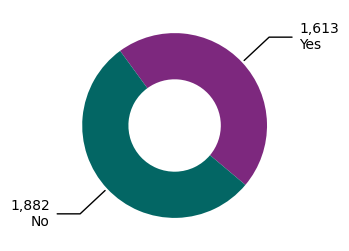

In [329]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

labels = ['Yes','No']
data = [1613,1882]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="w", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(f'{data[i]:,}')+"\n"+labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# ax.set_title("Document types")
plt.savefig("Documents/literature review/figures/explainability.svg",format='svg')
plt.savefig("Documents/literature review/figures/explainability.png",format='png')
plt.show()

### Change all output values to lists

In [306]:
import ast
def to_list(s):
    s = s.strip().lower()
    if s.startswith('['):
        s = ast.literal_eval(s)
    else:
        s = s.split(',')
    return s
    
domain_include_df['Output_list'] = domain_include_df['Output'].apply(to_list)

/var/folders/pq/1bk4s5t11rg3zhmr6v9nb1th0000gp/T/ipykernel_74966/3270432271.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_include_df['Output_list'] = domain_include_df['Output'].apply(to_list)


In [307]:
domain_include_df['Output_list']

1                                 [remaining useful life]
4                                 [setup cost prediction]
6       [fault detection,  fault tolerant control,  op...
8                                      [fault prediction]
15                                     [fault prediction]
                              ...                        
8991                 [degradation level and failure risk]
8997                                   [fault prediction]
8999                                   [fault prediction]
9000                              [remaining useful life]
9002                                   [fault prediction]
Name: Output_list, Length: 3495, dtype: object

### flatten list

In [308]:
import functools
import operator
outputs = functools.reduce(operator.iconcat, list(domain_include_df['Output_list']), [])

In [309]:
outputs = [s.strip() for s in outputs]
Counter(outputs).keys()

dict_keys(['remaining useful life', 'setup cost prediction', 'fault detection', 'fault tolerant control', 'optimization', 'planning', 'scheduling', 'fault prediction', 'asset health monitoring', 'predictive maintenance (equipment problems)', 'quality variable prediction', 'chain malfunction identification', 'root cause analysis', 'failure prediction', 'data compression / data reduction', 'anomaly detection', 'state estimation', 'none specified', 'decision making', 'process control and maintenance optimization', 'calibration accuracy/uncertainty management', 'condition monitoring', 'fault prediction / mechanical fault detection and location', 'error detection', 'health key performance indicators (hkpis)', 'fault prediction / fault detection and classification', 'forecasted inline value', 'monitoring of kpis / performance evaluation', 'fault prediction / anomaly detection', 'predictive maintenance / operational decision making', 'fire detection', 'yield enhancement', 'predictive maintena

In [248]:
with open('Documents/literature review/outputs.csv', 'a') as _file:
    for l in list(Counter(outputs).keys()):
        _file.write(l)
        _file.write('\n')

In [250]:
!wc -l "Documents/literature review/outputs.csv"

     420 Documents/literature review/outputs.csv


In [ ]:
'Fault detection',
'Fault prediction',
'Fault diagnosis',
'Remaining Useful Life',
'Root cause analysis',
'Predictive maintenance',

In [318]:
# Define keyword-based category matching
category_keywords = {
    'Fault detection': [r'\bdefect detection\b', r'\bfault detection\b', r'\bdetection\b', r'\berror detection\b',r'\bfault classification\b'],
    'Fault prediction': [r'\bfault prediction\b', r'\bfailure prediction\b', r'\bprediction\b', r'\bforecasting\b'],
    'Fault diagnosis': [r'\bfault diagnosis\b', r'\bdiagnosis\b', r'\bdiagnostic\b'],
    'Remaining Useful Life': [r'\bremaining useful life\b', r'\brul\b', r'\btime to failure\b'],
    'Root cause analysis': [r'\broot cause\b', r'\blocalization\b',r'bcausal\b'],
    'Predictive maintenance': [r'\bpredictive-maintenance\b', r'\bpredictive maintenance\b', r'\bmaintenance prediction\b', r'\bprognostics\b']
}

# Function to map output to categories
def map_to_category(output):
    output_lower = str(output).lower()
    for category, patterns in category_keywords.items():
        for pattern in patterns:
            if re.search(pattern, output_lower):
                return category
    return 'Other'

def map_list(output_list):
    new_list = []
    for l in output_list:
        l = l.split('/')
        for s in l:
            s = s.strip()
            new_list.append(map_to_category(s))

    return new_list
        

In [319]:
domain_include_df['Output_categories'] = domain_include_df['Output_list'].apply(map_list)

/var/folders/pq/1bk4s5t11rg3zhmr6v9nb1th0000gp/T/ipykernel_74966/81938408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_include_df['Output_categories'] = domain_include_df['Output_list'].apply(map_list)


In [320]:
domain_include_df.head()

,Domain,Domain category,Domain subcategory,Input,Output,Modeling category,Modeling technique,Explainability,Relevance,EID,Output_list,Output_categories
1,Industrial IoT applications,Industrial systems,NaN,"sensor data, time series",Remaining Useful Life,Data driven,"['CNN', 'RNN']",No,4.0,2-s2.0-85196096785,[remaining useful life],[Remaining Useful Life]
4,Chip manufacturing,Chip manufacturing,NaN,sensor data,Setup cost prediction,Data driven,Supervised learning,No,3.0,2-s2.0-85216668025,[setup cost prediction],[Fault prediction]
6,Process industries,Industrial systems,NaN,"process control data, sensor data, and possibl...","Fault detection, fault tolerant control, optim...",Reinforcement learning,Reinforcement Learning,No,2.0,2-s2.0-85184374776,"[fault detection, fault tolerant control, op...","[Fault detection, Other, Other, Other, Other]"
8,Chip manufacturing,Chip manufacturing,NaN,sensor data,Fault prediction,Hybrid,"Markov models, Lyapunov theory",Yes: Lyapunov analysis and Markov models,3.0,2-s2.0-85126287322,[fault prediction],[Fault prediction]
15,Chip manufacturing,Chip manufacturing,NaN,sensor data,Fault prediction,Data driven,"['Empirical Mode Decomposition (EMD)', 'Statis...",Yes: statistical complexity measures and empir...,3.0,2-s2.0-85125872513,[fault prediction],[Fault prediction]


In [322]:
# remove duplicates in output categories
domain_include_df['Output_categories'] = domain_include_df['Output_categories'].apply(lambda l: list(set(l)))

/var/folders/pq/1bk4s5t11rg3zhmr6v9nb1th0000gp/T/ipykernel_74966/2311876773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domain_include_df['Output_categories'] = domain_include_df['Output_categories'].apply(lambda l: list(set(l)))


In [323]:
domain_include_df.to_csv("Documents/literature review/bibtex/PdM-RUL-FDD-9006-scopus/extracted_data_select_domains.csv",index=None)

In [326]:
Output_categories = functools.reduce(operator.iconcat, list(domain_include_df['Output_categories']), [])
Output_categories_counts = Counter(Output_categories)

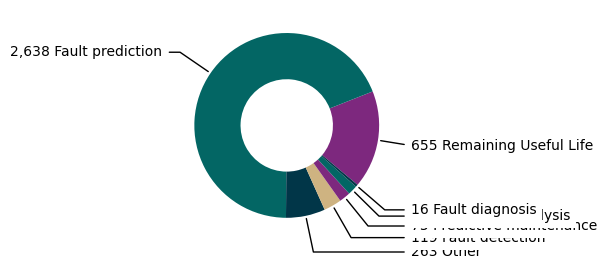

In [331]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

labels = list(Output_categories_counts.keys())
data = list(Output_categories_counts.values())

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="w", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(f'{data[i]:,}')+" "+labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# ax.set_title("Document types")
plt.savefig("Documents/literature review/figures/Output_categories.svg",format='svg')
plt.savefig("Documents/literature review/figures/Output_categories.png",format='png')
plt.show()

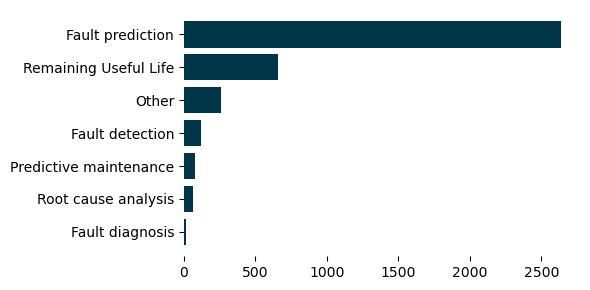

In [354]:
fig, ax = plt.subplots(figsize=(6, 3))

labels = list(Output_categories_counts.keys())
data = list(Output_categories_counts.values())

d = np.array(sorted(list(zip(data,labels))))

ax.barh(d[:,1], d[:,0].astype(int), color=colors[2])
# ax.barh(labels, int, color=colors[2])

ax.set_ylabel("")
# ax.set_xlabel("Frequency")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.savefig("Documents/literature review/figures/Output_categories_bar.svg",format='svg')
plt.savefig("Documents/literature review/figures/Output_categories_bar.png",format='png')
plt.show()

In [ ]:
Counter(domain_include_df['Modeling category'])

Counter({'Data driven': 2691,
         'Hybrid': 385,
         'Rules and/or logic based': 195,
         'Physics based': 70,
         'Knowledge based': 36,
         'Other': 25,
         'Physics informed': 24,
         'Model-based': 7,
         'Deep learning': 6,
         'Reinforcement learning': 5,
         'Unsupervised learning': 5,
         'Bayesian': 4,
         'Bayesian inference': 4,
         'Data driven, Hybrid': 3,
         'Statistics-based': 3,
         'Data-driven': 2,
         'Ensemble': 2,
         'Deep learning / Data driven': 2,
         'Interpretable machine learning': 1,
         'Supervised learning': 1,
         'Deep reinforcement learning': 1,
         'HMM (Hidden Markov Model)': 1,
         'Bayesian, Data driven': 1,
         'Unsupervised machine learning': 1,
         'Unsupervised, Data driven': 1,
         'Robust control / Hybrid (combines control theory and fault detection)': 1,
         'Statistical': 1,
         'Model Predictive Control': 

In [ ]:
df['Input'] = df['Input'].apply(lambda s: s.lower())

In [213]:
not_sensor_input = domain_include_df[(~domain_include_df['Input'].str.contains('sensor')) & 
    (~domain_include_df['Input'].str.contains('time series')) & 
    (~domain_include_df['Input'].str.contains('iot'))]

Counter(not_sensor_input['Input'])

Counter({'structured data': 158,
         'images': 76,
         'unstructured data': 13,
         'images, structured data': 4,
         'electrical signals': 3,
         "['structured data']": 3,
         'audio data': 3,
         'vibration data': 3,
         'sound data': 2,
         'acoustic emission signals': 2,
         'vibration signals': 2,
         'self-sensing signals from motor drive system': 1,
         'measured inputs and outputs': 1,
         'can bus data': 1,
         'audio samples': 1,
         'real-time data, historical data': 1,
         'condition monitoring data, life data, covariate distribution parameters': 1,
         'natural language text': 1,
         'infrared thermal images': 1,
         'current signals': 1,
         'acoustic signals': 1,
         'system states, system parameters': 1,
         'big data': 1,
         'data driven': 1,
         'images (spectrograms of vibration signals)': 1,
         'contextual factors': 1,
         "['natural la

In [62]:
Counter(df['Relevance'])

Counter({4.0: 3042, 2.0: 2598, 3.0: 2334, 1.0: 623, 0.0: 364, 5.0: 42})

In [204]:
print(len(df))
print(len(df) - 4604)
Counter(df['Explainability'])

9003
4399


Counter({'No': 4604,
         'Yes: Fuzzy logic': 40,
         'Yes: Kalman filter': 31,
         'Yes: Random Forest': 19,
         'Yes: PCA': 19,
         'Yes: Decision tree': 17,
         'Yes: Rules and/or logic based': 16,
         'Yes: Rules and logic': 15,
         'Yes: Rules and logic based': 15,
         'Yes: Decision trees': 15,
         'Yes: Bayesian inference': 14,
         'Yes: Rules-based': 13,
         'Yes: Decision Tree': 13,
         'Yes: SHAP': 12,
         'Yes: Bayesian network': 11,
         'Yes: Rules-based logic': 11,
         'Yes: Signal processing techniques': 11,
         'Yes: physics-based model': 10,
         'Yes: Random forest': 10,
         'Yes: Attention mechanism': 10,
         'Yes: Rules and logic based methods': 9,
         'Yes: Logistic regression': 8,
         'Yes: Digital Twin': 8,
         'Yes: attention mechanism': 8,
         'Yes: Residual-based fault detection': 7,
         'Yes: Wavelet analysis': 7,
         'Yes: feature im

In [ ]:
Counter(df['Modeling category'])

Counter({'Data driven': 6538,
         'Hybrid': 1040,
         'Rules and/or logic based': 725,
         'Physics based': 226,
         'Other': 101,
         'Knowledge based': 95,
         'Physics informed': 74,
         'Model-based': 35,
         'Deep learning': 12,
         'Reinforcement learning': 10,
         'Data driven, Hybrid': 10,
         'Bayesian': 9,
         'Supervised learning': 6,
         'Unsupervised learning': 6,
         'Bayesian inference': 6,
         'Data-driven': 5,
         'Deep learning / Data driven': 4,
         'Ensemble': 4,
         'Statistics-based': 4,
         'First principles': 4,
         'Unsupervised, Data driven': 3,
         'Unsupervised': 3,
         'Rule-based': 3,
         'Reinforcement Learning': 2,
         'Rule and/or logic based': 2,
         'Bayesian deep learning': 2,
         'Probabilistic': 2,
         'Unclear / Not specified': 1,
         'Statistics based': 1,
         'Interpretable machine learning': 1,
       

In [59]:
Counter(df['Input'])

Counter({'sensor data': 5678,
         'sensor data, time series': 990,
         'structured data': 477,
         'time series': 197,
         'images': 183,
         'sensor data, images': 82,
         'sensor data, structured data': 81,
         'sensor data, time series, images': 72,
         'unstructured data': 70,
         'sensor data, time series, structured data': 31,
         "['sensor data', 'time series', 'images']": 27,
         "['sensor data', 'time series', 'structured data']": 23,
         'sensor data, time series, unstructured data': 17,
         'images, sensor data': 17,
         "['sensor data', 'time series', 'unstructured data']": 13,
         'time series, images': 11,
         'images, structured data': 10,
         'sensor data, real-time data': 9,
         'vibration signals': 9,
         'sensor data, unstructured data': 8,
         "['images', 'sensor data']": 8,
         'sensor data (vibration signals)': 8,
         'time series, sensor data': 7,
       